# Projeto 2 - Machine Learning na Segurança do Trabalho Prevendo a Eficiência de Extintores de Incêndio

O teste hidrostático extintor é um procedimento estabelecido pelas normas da ABNT NBR 12962/2016, que determinam que todos os extintores devem ser testados a cada cinco anos, com a finalidade de identificar eventuais vazamentos, além de também verificar a
resistência do material do extintor. Com isso, o teste hidrostático extintor pode ser realizado em baixa e alta pressão, de acordo com estas normas em questão. O procedimento é realizado por profissionais técnicos da área e com a utilização de aparelhos específicos e apropriados para o teste, visto que eles devem fornecer resultados com exatidão.

Seria possível usar Machine Learning para prever o funcionamento de um extintor de incêndio com base em simulações feitas em computador e assim incluir uma camada adicional de segurança nas operações de uma empresa? Esse é o objetivo do Projeto com Feedback 2.
Usando dados reais disponíveis publicamente, seu trabalho é desenvolver um modelo de Machine Learning capaz de prever a eficiência de extintores de incêndio. 

# Base dados
No link abaixo você encontra os dados necessários para o seu trabalho:

**Base dados** :https://www.muratkoklu.com/datasets/vtdhnd07.php


# Descrição do projeto
O conjunto de dados foi obtido como resultado dos testes de extinção de quatro chamas de combustíveis diferentes com um sistema de extinção de ondas sonoras. O sistema de extinção de incêndio por ondas sonoras consiste em 4 subwoofers com uma potência total de 4.000 Watts.
Existem dois amplificadores que permitem que o som chegue a esses subwoofers como  amplificado. A fonte de alimentação que alimenta o sistema e o circuito do filtro garantindo que as frequências de som sejam transmitidas adequadamente para o sistema está localizada dentro da unidade de controle. Enquanto o computador é usado como fonte de frequência, o anemômetro foi usado para medir o fluxo de ar resultante das ondas sonoras durante a fase de extinção da chama e um decibelímetro para medir a intensidade do som. Um termômetro infravermelho foi utilizado para medir a temperatura da chama e da lata de combustível, e uma câmera é instalada para detectar o tempo de extinção da chama. Um total de 17.442 testes foram realizados com esta configuração experimental. 

# Problema négocio
Os experimentos foram planejados da seguinte forma:

- Três diferentes combustíveis líquidos e combustível GLP foram usados para criar a chama.

- 5 tamanhos diferentes de latas de combustível líquido foram usados para atingir diferentes tamanhos de chamas.

- O ajuste de meio e cheio de gás foi usado para combustível GLP.

Durante a realização de cada experimento, o recipiente de combustível, a 10 cm de distância, foi movido para frente até 190 cm, aumentando a distância em 10 cm a cada vez. Junto com o recipiente de combustível, o anemômetro e o decibelímetro foram movidos para frente
nas mesmas dimensões. Experimentos de extinção de incêndio foram conduzidos com 54 ondas sonoras de frequências diferentes em cada distância e tamanho de chama. Ao longo dos experimentos de extinção de chama, os dados obtidos de cada dispositivo
de medição foram registrados e um conjunto de dados foi criado. O conjunto de dados inclui as características do tamanho do recipiente de combustível representando o tamanho da chama, tipo de combustível, frequência, decibéis, distância, fluxo de ar e extinção da chama. Assim, 6 recursos de entrada e 1 recurso de saída serão usados no modelo que você vai construir. 

# Objetivo 

**A coluna de status (extinção de chama ou não extinção da chama) pode ser prevista usando os seis recursos de entrada no conjunto de dados.**
Os recursos de status e combustível são categóricos, enquanto outros recursos são numéricos. Seu trabalho é construir um modelo de Machine Learning capaz de prever, com base em novos dados, se a chama será extinta ou não ao usar um extintor de incêndio.

# Objetivo modelo machine learning

**Definição**:

In [1]:
# Importação das bibliotecas 

# Bibliotecas sistema
import re
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 
from numpy.linalg import lstsq
from numpy.random import randn, seed

# Bibliotecas machine learning
import sklearn
from matplotlib import pyplot as plt

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

# Configuração para os gráficos largura e layout dos graficos
plt.style.use('fivethirtyeight')

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print('Versão python neste Jupyter Notebook:', python_version())

Author: Versões das bibliotecas

seaborn   : 0.12.2
sklearn   : 0.0.post5
plotly    : 5.9.0
re        : 2.2.1
numpy     : 1.24.3
pandas    : 2.0.3
matplotlib: 3.7.1
watermark : 2.4.2

Versão python neste Jupyter Notebook: 3.9.13


In [2]:
# Base dados
data = pd.read_excel("Acoustic_Extinguisher_Fire_Dataset.xlsx")
data

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [3]:
# Visualizando os 5 primeiros dados
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [4]:
# Visualizando os 5 últimos dados
data.tail()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0
17441,7,lpg,190,72,0.0,1,0


In [5]:
# Linhas e colunas
data.shape

(17442, 7)

In [6]:
# Info dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [7]:
# Tipos dados
data.dtypes

SIZE           int64
FUEL          object
DISTANCE       int64
DESIBEL        int64
AIRFLOW      float64
FREQUENCY      int64
STATUS         int64
dtype: object

In [8]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
SIZE,17442.0,3.411765,1.750977,1.0,2.0,3.0,5.0,7.0
DISTANCE,17442.0,100.000000,54.773826,10.0,50.0,100.0,150.0,190.0
DESIBEL,17442.0,96.379142,8.164096,72.0,90.0,95.0,104.0,113.0
AIRFLOW,17442.0,6.975634,4.736169,0.0,3.2,5.8,11.2,17.0
FREQUENCY,17442.0,31.611111,20.939149,1.0,14.0,27.5,47.0,75.0
STATUS,17442.0,0.497821,0.500010,0.0,0.0,0.0,1.0,1.0


# Pré-processamento


Pré-processamento de dados é uma etapa fundamental em projetos de machine learning e análise de dados. É o processo de limpar, transformar e preparar os dados brutos para que possam ser adequadamente utilizados por algoritmos de machine learning ou para análises estatísticas.

O pré-processamento de dados é uma fase crítica, pois dados não tratados ou inadequadamente tratados podem resultar em modelos imprecisos ou inválidos, prejudicando os resultados e as conclusões. As etapas de pré-processamento podem variar dependendo do tipo de dado e do problema a ser resolvido, mas geralmente incluem as seguintes tarefas:

Remoção de Dados Ausentes: Identificar e lidar com valores faltantes nos dados. Isso pode envolver a exclusão de instâncias com dados ausentes ou o preenchimento desses valores usando técnicas como imputação.

Tratamento de Outliers: Detectar e lidar com valores atípicos (outliers) que podem afetar negativamente a performance do modelo. Outliers podem ser removidos ou transformados para reduzir seu impacto.

Codificação de Variáveis Categóricas: Converter atributos categóricos em uma representação numérica para que possam ser usados em algoritmos de machine learning. Isso pode envolver técnicas como o One-Hot Encoding.

Normalização ou Padronização: Ajustar os valores das variáveis para uma escala específica ou distribuição para evitar problemas relacionados a diferentes escalas dos atributos.

Seleção de Características: Identificar e selecionar as características (atributos) mais relevantes para a tarefa em questão. Isso pode envolver a análise da importância das características ou o uso de técnicas de seleção de características.

Redução de Dimensionalidade: Em casos de conjuntos de dados com muitas características, é possível aplicar técnicas de redução de dimensionalidade para diminuir o número de atributos e simplificar o modelo.

Divisão do Conjunto de Dados: Separar o conjunto de dados em subconjuntos de treinamento, validação e teste, permitindo avaliar a performance do modelo em dados não vistos previamente.

Balanceamento de Classes: Em problemas de classificação com classes desbalanceadas, é possível aplicar técnicas para balancear a distribuição das classes no conjunto de treinamento.

Essas são apenas algumas das tarefas comuns realizadas no pré-processamento de dados. A qualidade e a adequação do pré-processamento têm grande influência no desempenho e na eficácia dos modelos de machine learning. Portanto, é importante realizar essa etapa com cuidado e atenção para garantir que os dados estejam devidamente preparados para a análise ou o treinamento do modelo.

In [9]:
# Separando os atributos (X) e a coluna alvo (y)
x = data.drop("STATUS", axis=1)
y = data["STATUS"]

In [10]:
# Total de linhas e colunas dados variável x
x.shape

(17442, 6)

In [11]:
# Total de linhas e colunas dados variável y
y.shape

(17442,)

# One-Hot Encoding 

One-Hot Encoding (também conhecido como one-of-K encoding) é uma técnica de pré-processamento de dados usada para transformar variáveis categóricas em uma representação numérica adequada para algoritmos de machine learning. Ela é especialmente útil quando se lida com atributos categóricos que não têm uma ordem natural ou que não podem ser diretamente interpretados como números.

Em muitos algoritmos de machine learning, os dados devem ser representados numericamente para que o modelo possa aprender a partir deles. No entanto, quando temos atributos categóricos, como "gênero" com categorias "masculino" e "feminino", não faz sentido atribuir números arbitrários como 1 e 2 para essas categorias, pois isso poderia implicar em uma relação de ordem entre elas.

O One-Hot Encoding resolve esse problema criando uma nova representação binária para cada categoria presente no atributo categórico. O processo consiste em criar colunas adicionais para cada categoria única, onde o valor 1 é atribuído à categoria presente na instância e 0 é atribuído às demais categorias. Dessa forma, cada categoria se torna uma variável binária distinta.

Por exemplo, suponha que temos um atributo categórico chamado "cor" com as categorias "vermelho", "azul" e "verde". Após aplicar o One-Hot Encoding, o atributo seria transformado em três novos atributos binários:

cor_vermelho	cor_azul	cor_verde
1	                0           0

0	                1           0 

0                   0           1  	

1	                0           0 


Dessa forma, cada instância é representada por um vetor binário que indica a presença ou ausência de cada categoria categórica. Essa representação numérica permite que os algoritmos de machine learning trabalhem de maneira adequada com atributos categóricos.

É importante ressaltar que o One-Hot Encoding pode aumentar a dimensionalidade do conjunto de dados, especialmente quando existem muitas categorias únicas. Em alguns casos, técnicas de redução de dimensionalidade podem ser aplicadas após o One-Hot Encoding para lidar com esse problema.

In [12]:
# Codificando a variável categórica "FUEL" usando one-hot
x = pd.get_dummies(x, columns=["FUEL"])

In [132]:
# Lidando com valores ausentes
x = x.fillna(x.mean())  # Preencher valores ausentes com a média

# Normalizando dados

A normalização de dados é uma técnica comum de pré-processamento utilizada em machine learning para ajustar as características (ou atributos) dos dados para uma escala específica ou um intervalo padronizado. O objetivo da normalização é tornar os dados comparáveis e facilitar o processo de treinamento dos modelos, melhorando o desempenho e a convergência durante o treinamento.

A normalização é particularmente importante quando os atributos têm escalas diferentes, variando em ordens de grandeza distintas. Essa discrepância nas escalas pode afetar negativamente o desempenho de muitos algoritmos de machine learning, especialmente aqueles que utilizam medidas de distância, como k-Nearest Neighbors (k-NN) ou algoritmos baseados em gradiente.

In [16]:
from sklearn.preprocessing import StandardScaler

# Normalizando/Padronizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(x)

# Treinamento modelo 

O treinamento de um modelo de machine learning é o processo pelo qual o algoritmo "aprende" a relação entre os dados de entrada (características ou atributos) e os rótulos (ou variável alvo) associados a esses dados. Em outras palavras, é durante o treinamento que o modelo ajusta seus parâmetros de modo a mapear corretamente os padrões nos dados, permitindo que ele faça previsões ou classificações em novos dados que nunca foram vistos anteriormente.

O processo de treinamento envolve as seguintes etapas:

Preparação dos dados: Os dados de treinamento precisam ser preparados e organizados antes do início do treinamento. Isso inclui o pré-processamento dos dados, como tratamento de valores ausentes, normalização, codificação de variáveis categóricas, entre outros.

Definição do modelo: É escolhido o tipo de algoritmo ou modelo de machine learning a ser utilizado para a tarefa em questão. A escolha do modelo depende do tipo de problema, seja ele de classificação, regressão, agrupamento ou outro.

Divisão dos dados: O conjunto de dados é dividido em duas partes principais: o conjunto de treinamento e o conjunto de teste. O conjunto de treinamento é usado para ensinar o modelo a aprender os padrões nos dados, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo em dados não vistos durante o treinamento.

Treinamento: Durante o treinamento, o modelo recebe os dados de treinamento e ajusta seus parâmetros para minimizar uma função de perda (loss function) que quantifica o quão bem o modelo está se comportando em relação aos rótulos reais dos dados.

Validação e ajuste de hiperparâmetros: Em muitos casos, é necessário ajustar os hiperparâmetros do modelo para obter um melhor desempenho. Isso pode ser feito utilizando técnicas como GridSearchCV ou Random Search.

Avaliação do desempenho: Após o treinamento, o modelo é avaliado usando o conjunto de teste para medir sua capacidade de generalização em dados não vistos anteriormente. Isso ajuda a verificar se o modelo está realizando previsões precisas e confiáveis.

Implantação: Após o treinamento e validação, o modelo pode ser implantado em um ambiente de produção para fazer previsões ou classificações em novos dados.

O treinamento de um modelo de machine learning é uma etapa essencial para a criação de um sistema inteligente e depende de diversos fatores, como a qualidade dos dados, a escolha adequada do modelo e a otimização dos hiperparâmetros. Um modelo bem treinado tem o potencial de realizar tarefas complexas e tomar decisões baseadas em padrões ocultos nos dados.

- 20 para os dados de treino e 80 para teste e random state igual a zero

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [18]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train.shape

(13953, 9)

In [19]:
# Total de linhas dos dados de treino y
y_train.shape

(13953,)

In [20]:
# Total de linhas e colunas dos dados de treino x teste 
x_test.shape

(3489, 9)

In [21]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(3489,)

# Hiperparâmetros machine learning


Em machine learning, hiperparâmetros são parâmetros que não são aprendidos diretamente pelo modelo durante o processo de treinamento. Eles são configurados antes do treinamento e têm a finalidade de controlar o comportamento e o desempenho do algoritmo de aprendizado.

Ao contrário dos parâmetros do modelo, que são ajustados pelo algoritmo durante o treinamento para se adaptar aos dados específicos do conjunto de treinamento, os hiperparâmetros são definidos pelo cientista de dados ou engenheiro de machine learning com base no conhecimento do problema e do algoritmo utilizado.

A escolha adequada dos hiperparâmetros pode influenciar significativamente o desempenho, a capacidade de generalização e a eficiência do modelo. Em muitos casos, encontrar os melhores hiperparâmetros é uma tarefa desafiadora, e é aí que técnicas como GridSearchCV e Random Search entram em jogo para otimizar esses valores.

Alguns exemplos de hiperparâmetros em diferentes algoritmos de machine learning incluem:

1) Modelos de árvore de decisão:

- Profundidade máxima da árvore (max_depth)

- Número mínimo de amostras em um nó folha (min_samples_leaf)

- Número mínimo de amostras necessárias para dividir um nó interno (min_samples_split)

- Modelos de Support Vector Machines (SVM):

2) Parâmetro de regularização C

- Tipo de kernel (linear, polinomial, RBF, etc.)

- Modelos de redes neurais (Deep Learning):

3) Número de camadas ocultas

- Número de neurônios em cada camada

- Taxa de aprendizado (learning rate)

- Modelos de Regressão Linear:

4) Coeficiente de regularização (alpha)

- Modelos de k-Nearest Neighbors (k-NN):

- Número de vizinhos (k)

Esses são apenas alguns exemplos, e a quantidade e o tipo de hiperparâmetros podem variar dependendo do algoritmo de machine learning utilizado. A definição correta dos hiperparâmetros é crucial para obter um modelo com bom desempenho e capacidade de generalização em diferentes conjuntos de dados. É comum realizar a otimização desses hiperparâmetros usando técnicas como GridSearchCV ou Random Search para encontrar as melhores configurações que produzam o modelo mais adequado para a tarefa em questão.

**Encontrando o valor de K**

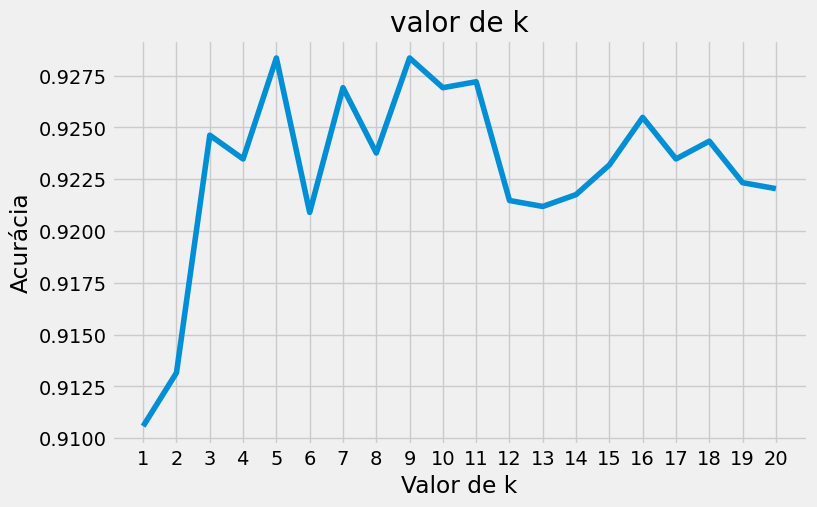

CPU times: total: 453 ms
Wall time: 1.46 s


In [131]:
%%time

# Importando biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Lista de valores de k a serem testados
k_values = list(range(1, 21))  # Substitua pelos valores de k que deseja testar

# Lista para armazenar as acurácias
accuracies = []

# Iterar sobre os valores de k e calcular a acurácia
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotar o gráfico de acurácia versus k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies)
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.title('valor de k')
plt.xticks(k_values)
plt.show()

# GridSearchCV

GridSearchCV, abreviação de "Grid Search Cross-Validation", é uma técnica utilizada para otimizar os hiperparâmetros de um modelo de machine learning de forma sistemática. Hiperparâmetros são parâmetros definidos antes do treinamento do modelo e não são aprendidos a partir dos dados, ao contrário dos parâmetros do modelo que são ajustados durante o treinamento.

A técnica de GridSearchCV busca encontrar a combinação ideal de valores para os hiperparâmetros do modelo, de forma a maximizar o desempenho do modelo em uma métrica específica, como acurácia, precisão ou F1-score. Essa busca é feita por meio da avaliação do modelo em várias combinações de valores para os hiperparâmetros, realizando um processo de validação cruzada (cross-validation) para evitar problemas de overfitting e garantir resultados mais robustos.

O procedimento básico do GridSearchCV é o seguinte:

Definição do espaço de busca: É necessário definir um conjunto de valores possíveis para cada hiperparâmetro que se deseja otimizar. Por exemplo, para o parâmetro "número de vizinhos" (k) em um modelo k-NN, pode-se definir uma lista de possíveis valores como [1, 3, 5, 7].

Criação do grid de hiperparâmetros: O GridSearchCV cria todas as combinações possíveis entre os valores definidos para os diferentes hiperparâmetros. Por exemplo, se tivermos dois hiperparâmetros a serem otimizados, cada um com três valores possíveis, o GridSearchCV criará um grid com 9 combinações.

Treinamento e validação cruzada: Para cada combinação de hiperparâmetros, o modelo é treinado e avaliado utilizando um processo de validação cruzada, onde os dados são divididos em "folds" (dobras) e o modelo é treinado em várias iterações, alternando entre treino e teste em diferentes partes do conjunto de dados.

Avaliação do desempenho: Uma métrica de avaliação é utilizada para medir o desempenho do modelo em cada combinação de hiperparâmetros. A métrica pode variar dependendo do tipo de problema, como acurácia para classificação ou erro médio para regressão.

Seleção do melhor modelo: Após a busca por todas as combinações de hiperparâmetros, o GridSearchCV seleciona o modelo que obteve o melhor desempenho de acordo com a métrica especificada.

O GridSearchCV é uma técnica amplamente utilizada para encontrar os melhores hiperparâmetros para modelos de machine learning, permitindo que os modelos sejam ajustados de maneira mais precisa e otimizada, resultando em modelos com melhor desempenho e generalização para novos dados.

# Modelo 1 - K-NN GridSearchCV

In [52]:
%%time

# Importando biblioteca
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir a grade de hiperparâmetros para o KNN com distância de Manhattan
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Número de vizinhos
    'weights': ['uniform', 'distance']  # Peso dos vizinhos (uniforme ou inversamente proporcional à distância)
}

# Criar o modelo KNN com distância de Manhattan
knn = KNeighborsClassifier(metric='manhattan')

# Criar o objeto GridSearchCV para busca dos melhores hiperparâmetros
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


# Realizar a busca dos melhores hiperparâmetros usando os dados de treinamento
grid_search.fit(x_train, y_train)

# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Treinar o modelo com os melhores hiperparâmetros no conjunto de treinamento completo
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                metric='manhattan')
best_knn.fit(x_train, y_train)

Melhores hiperparâmetros: {'n_neighbors': 9, 'weights': 'distance'}
CPU times: total: 500 ms
Wall time: 1.59 s


KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [53]:
# Fazer previsões no conjunto de teste
y_pred = best_knn.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [104]:
# Accuracy score model
accuracy_knn_GridSearchCV = accuracy_score(y_test, y_pred)
print("Acurácia - K-NN GridSearchCV: %.2f" % (accuracy_knn_GridSearchCV * 100))

Acurácia - K-NN GridSearchCV: 96.47


In [116]:
matrix_confusion3 = confusion_matrix(y_test, y_pred)

print('Confusion matrix - K-NN GridSearchCV \n\n', matrix_confusion3)
print('\nTrue Positives(TP) = ', matrix_confusion3[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion3[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion3[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion3[1,0])

Confusion matrix - K-NN GridSearchCV 

 [[1656   58]
 [  65 1710]]

True Positives(TP) =  1656

True Negatives(TN) =  1710

False Positives(FP) =  58

False Negatives(FN) =  65


In [66]:
# Classification report model knn
class_report = classification_report(y_test, y_pred)
print("Modelo - K-NN GridSearchCV")
print("\n")
print(class_report)

Modelo - K-NN GridSearchCV


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1714
           1       0.94      0.90      0.92      1775

    accuracy                           0.92      3489
   macro avg       0.92      0.92      0.92      3489
weighted avg       0.92      0.92      0.92      3489



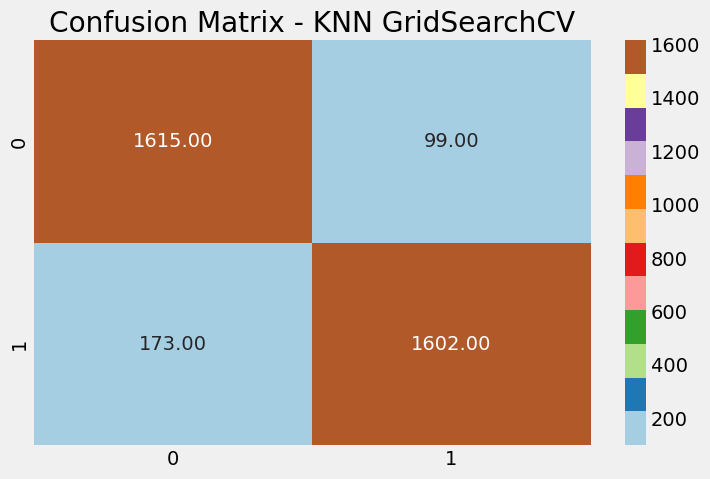

In [76]:
# Confusion matrix
matrix_confusion_4 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".2f", cmap="Paired"); 
ax.set_title('Confusion Matrix - KNN GridSearchCV'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Modelo 2 K-NN - Random search

Random Search, ou busca aleatória, é uma técnica de otimização de hiperparâmetros para modelos de machine learning. Assim como o GridSearchCV, o Random Search tem como objetivo encontrar a combinação ideal de hiperparâmetros que maximize o desempenho do modelo em uma métrica específica.

A principal diferença entre o Random Search e o GridSearchCV está na estratégia de busca pelos hiperparâmetros. Enquanto o GridSearchCV realiza uma busca exaustiva e sistemática, percorrendo todas as combinações possíveis dos valores definidos para os hiperparâmetros, o Random Search realiza a busca de forma aleatória, amostrando diferentes combinações de valores em cada iteração.

O procedimento básico do Random Search é o seguinte:

Definição do espaço de busca: Da mesma forma que no GridSearchCV, é necessário definir um conjunto de valores possíveis para cada hiperparâmetro que se deseja otimizar.

Número de iterações: É preciso determinar o número de iterações ou tentativas que o algoritmo fará. Cada iteração corresponde a uma combinação aleatória de hiperparâmetros.

Amostragem aleatória: Em cada iteração, o Random Search seleciona aleatoriamente uma combinação de valores para os hiperparâmetros dentro do espaço de busca definido.

Treinamento e validação cruzada: Para cada combinação de hiperparâmetros, o modelo é treinado e avaliado utilizando um processo de validação cruzada, assim como no GridSearchCV.

Avaliação do desempenho: Uma métrica de avaliação é utilizada para medir o desempenho do modelo em cada combinação de hiperparâmetros.

Seleção do melhor modelo: Após o número pré-determinado de iterações, o Random Search seleciona o modelo que obteve o melhor desempenho de acordo com a métrica especificada.

A principal vantagem do Random Search em relação ao GridSearchCV é que, para um número fixo de iterações, o Random Search geralmente encontra bons conjuntos de hiperparâmetros mais rapidamente, uma vez que não percorre todas as combinações possíveis. Isso pode ser especialmente útil quando o espaço de busca é muito grande e a busca exaustiva seria computacionalmente inviável.

Em resumo, o Random Search é uma alternativa eficiente e eficaz ao GridSearchCV para a otimização de hiperparâmetros em modelos de machine learning, pois permite encontrar boas combinações de valores de forma mais rápida e menos custosa computacionalmente.

In [101]:
from sklearn.model_selection import RandomizedSearchCV

# Definir a grade de hiperparâmetros para o KNN com distância de Manhattan
param_dist = {
    'n_neighbors': np.arange(1, 20),   # Número de vizinhos
    'weights': ['uniform', 'distance'] # Peso dos vizinhos (uniforme ou inversamente proporcional à distância)
}

# Criar o modelo KNN com distância de Manhattan
knn = KNeighborsClassifier(metric='manhattan')

# Criar o objeto RandomizedSearchCV para busca dos melhores hiperparâmetros
random_search = RandomizedSearchCV(knn, 
                                   param_distributions=param_dist, 
                                   n_iter=10, 
                                   cv=5, 
                                   scoring='accuracy', 
                                   random_state=42)

# Realizar a busca dos melhores hiperparâmetros usando os dados de treinamento
random_search.fit(x_train, y_train)

# Obter os melhores hiperparâmetros encontrados
best_params = random_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Treinar o modelo com os melhores hiperparâmetros no conjunto de treinamento completo
best_knn_2 = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                metric='manhattan')
best_knn_2.fit(x_train, y_train)

Melhores hiperparâmetros: {'weights': 'distance', 'n_neighbors': 14}


KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='distance')

In [70]:
# Fazer previsões no conjunto de teste
model_knn_pred = best_knn.predict(x_test)

In [103]:
# Accuracy score model
accuracy_knn_Randomized_Search_CV = accuracy_score(y_test, model_knn_pred)
print("Acurácia - K-NN Randomized Search CV: %.2f" % (accuracy_knn_Randomized_Search_CV * 100))

Acurácia - K-NN Randomized Search CV: 93.81


In [115]:
matrix_confusion3 = confusion_matrix(y_test, model_knn_pred)

print('Confusion matrix - K-NN Randomized Search CV \n\n', matrix_confusion3)
print('\nTrue Positives(TP) = ', matrix_confusion3[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion3[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion3[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion3[1,0])

Confusion matrix - K-NN Randomized Search CV 

 [[1622   92]
 [ 124 1651]]

True Positives(TP) =  1622

True Negatives(TN) =  1651

False Positives(FP) =  92

False Negatives(FN) =  124


In [72]:
# Classification report model knn
class_report = classification_report(y_test, model_knn_pred)
print("Modelo - K-NN Randomized Search CV")
print("\n")
print(class_report)

Modelo - K-NN Randomized Search CV


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1714
           1       0.95      0.93      0.94      1775

    accuracy                           0.94      3489
   macro avg       0.94      0.94      0.94      3489
weighted avg       0.94      0.94      0.94      3489



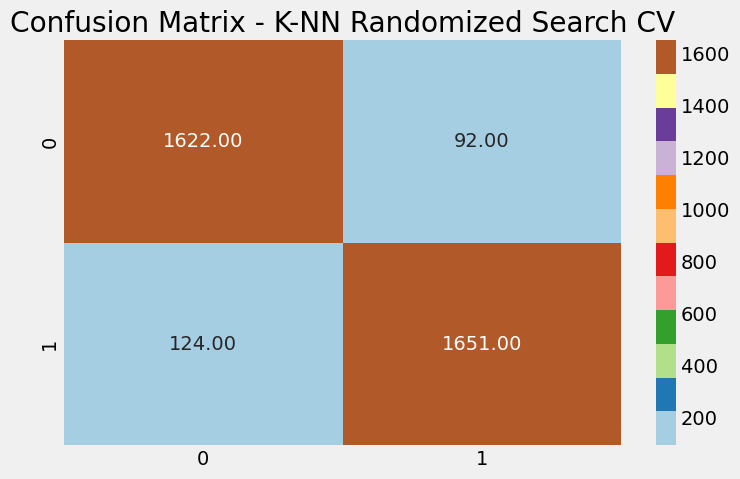

In [87]:
# Confusion matrix
matrix_confusion_5 = confusion_matrix(y_test, model_knn_pred)

plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_5, annot=True, ax = ax, fmt = ".2f", cmap="Paired"); 
ax.set_title('Confusion Matrix - K-NN Randomized Search CV'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Modelo 03 - XGBoost

In [22]:
%%time

# Importando biblioteca
import xgboost as xgb

# Definindo os hiperparâmetros a serem ajustados
# Criando o modelo XGBoost com os hiperparâmetros definidos
params = {
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'random_state': 42
}

# Criando o modelo XGBoost com os hiperparâmetros definidos
modelo_xgb = xgb.XGBClassifier(**params)

# Treinando o modelo
modelo_xgb_fit = modelo_xgb.fit(x_train, y_train)

CPU times: total: 844 ms
Wall time: 148 ms


In [25]:
# Fazendo previsões no conjunto de teste
y_pred = modelo_xgb.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [105]:
# Acúracia do modelo de Regressão logística
from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy_xgbt = accuracy_score(y_test, y_pred)
print("Acurácia - XGBoost: %.2f" % (accuracy_xgbt * 100))

Acurácia - XGBoost: 96.47


In [114]:
matrix_confusion2 = confusion_matrix(y_test, y_pred)

print('Confusion matrix - XGBoost \n\n', matrix_confusion2)
print('\nTrue Positives(TP) = ', matrix_confusion2[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion2[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion2[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion2[1,0])

Confusion matrix - XGBoost 

 [[1656   58]
 [  65 1710]]

True Positives(TP) =  1656

True Negatives(TN) =  1710

False Positives(FP) =  58

False Negatives(FN) =  65


In [28]:
# Classification report
from sklearn.metrics import classification_report

classification = classification_report(y_test, y_test)
print("Modelo - XGBoost")
print()
print(classification)

Modelo - XGBoost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1714
           1       1.00      1.00      1.00      1775

    accuracy                           1.00      3489
   macro avg       1.00      1.00      1.00      3489
weighted avg       1.00      1.00      1.00      3489



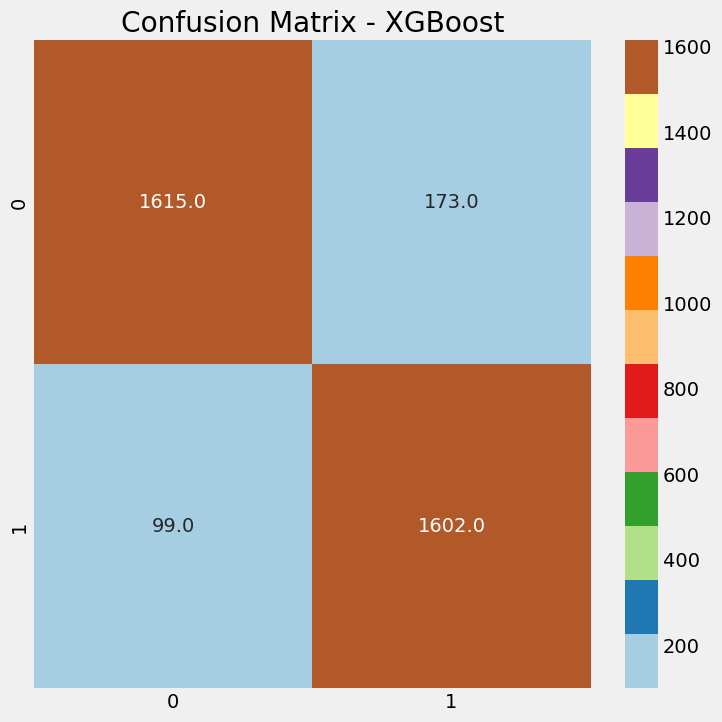

In [77]:
from sklearn.metrics import confusion_matrix

matrix_1 = confusion_matrix(y_pred, y_test)

# Plot matriz de confusão
plt.figure(figsize=(8, 8))

ax = plt.subplot()
sns.heatmap(matrix_1, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - XGBoost'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Pipeline 

Pipeline de Machine Learning refere-se a uma sequência ordenada de etapas ou processos que são realizados em um fluxo contínuo para desenvolver e implementar um modelo de machine learning. Essas etapas podem incluir pré-processamento de dados, seleção de características, treinamento do modelo, validação, ajuste de hiperparâmetros e avaliação do desempenho do modelo.

A ideia por trás do pipeline é facilitar o desenvolvimento, organização e reutilização de código, bem como garantir que todas as etapas necessárias para criar um modelo de machine learning sejam executadas de forma sequencial e consistente.

As principais etapas de um pipeline de machine learning podem ser resumidas da seguinte forma:

Coleta de dados: O primeiro passo é coletar os dados relevantes para o problema que se deseja resolver por meio do modelo de machine learning.

Pré-processamento de dados: Nesta etapa, os dados brutos são limpos, transformados e preparados para serem utilizados pelo modelo. Isso inclui tratamento de dados ausentes, normalização, codificação de variáveis categóricas, entre outras técnicas.

Seleção de características: É o processo de escolher as características (ou atributos) mais relevantes do conjunto de dados que serão usadas para treinar o modelo. Isso ajuda a reduzir a dimensionalidade dos dados e pode melhorar o desempenho do modelo.

Divisão do conjunto de dados: O conjunto de dados é dividido em subconjuntos de treinamento e teste para avaliar a capacidade de generalização do modelo.

Treinamento do modelo: O modelo de machine learning é alimentado com os dados de treinamento para aprender a relação entre as características e os rótulos (ou variável alvo).

Ajuste de hiperparâmetros: Muitos modelos de machine learning têm hiperparâmetros que precisam ser configurados para obter o melhor desempenho. O ajuste de hiperparâmetros envolve encontrar a combinação ideal de valores para esses parâmetros.

Validação do modelo: O modelo treinado é avaliado utilizando os dados de teste para verificar como ele se comporta em dados não vistos previamente.

Avaliação do desempenho: Métricas apropriadas são usadas para medir a qualidade do modelo em termos de acurácia, precisão, recall, F1-score, entre outras.

Implantação do modelo: Após a criação e validação do modelo, ele pode ser implantado para fazer previsões em novos dados em ambiente de produção.

A criação de um pipeline de machine learning facilita a repetibilidade e a manutenção do processo, permitindo que cientistas de dados e engenheiros de machine learning iterem rapidamente, testando diferentes configurações e abordagens para resolver o problema em questão.

**Pipeline 1 - K-NN**

In [78]:
from sklearn.pipeline import Pipeline

# Criar o pipeline com o KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Etapa de pré-processamento: padronização dos dados
    ('knn', KNeighborsClassifier()) # Etapa de modelagem: K-Nearest Neighbors
])

# Treinar o modelo usando o pipeline no conjunto de treinamento
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [83]:
# Fazer previsões no conjunto de teste
pred_pipeline = pipeline.predict(x_test)

In [85]:
# Accuracy score model
accuracy_knn = accuracy_score(y_test, pred_pipeline)
print("Acurácia - K-NN Pipeline: %.2f" % (accuracy_knn * 100))

Acurácia - K-NN Pipeline: 96.47


In [86]:
# Classification report model knn
class_report = classification_report(y_test, pred_pipeline)
print("Modelo - K-NN Pipeline")
print("\n")
print(class_report)

Modelo - K-NN Pipeline


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1714
           1       0.97      0.96      0.97      1775

    accuracy                           0.96      3489
   macro avg       0.96      0.96      0.96      3489
weighted avg       0.96      0.96      0.96      3489



In [110]:
matrix_confusion_5 = confusion_matrix(y_test, pred_pipeline)

print('Confusion matrix - KNN Pipeline \n\n', matrix_confusion_5)
print('\nTrue Positives(TP) = ', matrix_confusion_5[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion_5[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion_5[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion_5[1,0])

Confusion matrix - KNN Pipeline 

 [[1683   31]
 [  27 1748]]

True Positives(TP) =  1683

True Negatives(TN) =  1748

False Positives(FP) =  31

False Negatives(FN) =  27


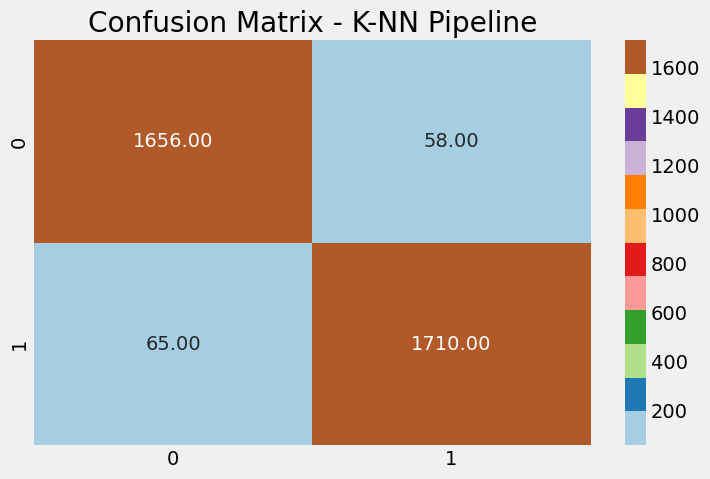

In [88]:
# Confusion matrix
matrix_confusion_5 = confusion_matrix(y_test, pred_pipeline)

plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_5, annot=True, ax = ax, fmt = ".2f", cmap="Paired"); 
ax.set_title('Confusion Matrix - K-NN Pipeline'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

**Pipeline 2 - XGBoost**

In [90]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Criar o pipeline com o XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Etapa de pré-processamento: padronização dos dados
    ('xgb', XGBClassifier())           # Etapa de modelagem: XGBoost Classifier
])

# Treinar o modelo usando o pipeline no conjunto de treinamento
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [92]:
# Fazer previsões no conjunto de teste
pred_pipeline2 = pipeline.predict(x_test)

In [97]:
# Accuracy score model
accuracy_XGBoost = accuracy_score(y_test, pred_pipeline2)
print("Acurácia - XGBoost: %.2f" % (accuracy_XGBoost * 100))

Acurácia - XGBoost: 98.34


In [98]:
# Classification report model knn
class_report = classification_report(y_test, pred_pipeline2)
print("Modelo - XGBoost Pipeline")
print("\n")
print(class_report)

Modelo - XGBoost Pipeline


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1714
           1       0.98      0.98      0.98      1775

    accuracy                           0.98      3489
   macro avg       0.98      0.98      0.98      3489
weighted avg       0.98      0.98      0.98      3489



In [112]:
matrix_confusion = confusion_matrix(y_test, pred_pipeline2)

print('Confusion matrix - XGBoost Pipeline \n\n', matrix_confusion)
print('\nTrue Positives(TP) = ', matrix_confusion[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion[1,0])

Confusion matrix - XGBoost Pipeline 

 [[1683   31]
 [  27 1748]]

True Positives(TP) =  1683

True Negatives(TN) =  1748

False Positives(FP) =  31

False Negatives(FN) =  27


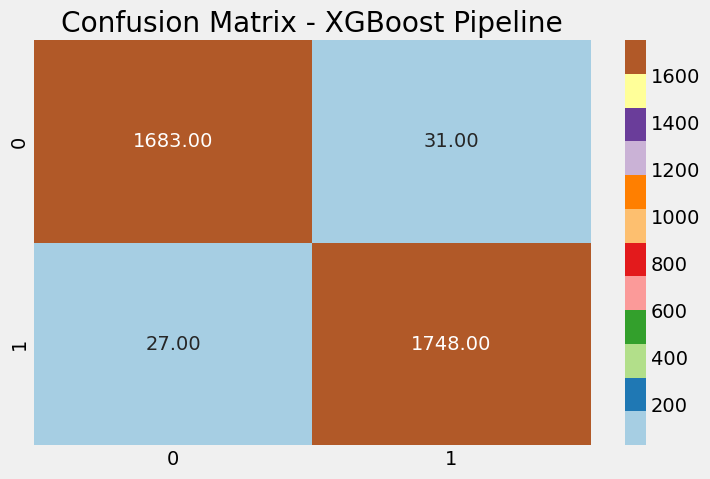

In [99]:
# Confusion matrix
matrix_confusion_5 = confusion_matrix(y_test, pred_pipeline2)

plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_5, annot=True, ax = ax, fmt = ".2f", cmap="Paired"); 
ax.set_title('Confusion Matrix - XGBoost Pipeline'); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

# Resultado final

In [108]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["K-NN GridSearchCV",
               "K-NN - Random search",  
               "XGBoost"],

    "Acurácia" :[accuracy_knn_GridSearchCV,
                 accuracy_knn_Randomized_Search_CV, 
                 accuracy_xgbt]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Models,Acurácia
0,K-NN GridSearchCV,0.964746
2,XGBoost,0.964746
1,K-NN - Random search,0.938091


# Salvando modelo 

In [102]:
# Importando biblioteca pickle
import pickle

# Salvando o modelo em formato .pkl - Modelo - Naive bayes
with open("knn_Grid_Search_CV.pkl", "wb") as f:
    pickle.dump(best_knn, f)
      
# Salvando o modelo em formato .pkl - XGBoost
with open("knn_Randomized_Search_CV.pkl", "wb") as f:
    pickle.dump(best_knn_2, f)
    
# Salvando o modelo em formato .pkl - XGBoost
with open("modelo_xgb.pkl", "wb") as f:
    pickle.dump(modelo_xgb, f)

# Conclusão



O modelo Turning teve uma acurácia boa, assim como o K-NN GridSearchCV, que se destacou como o melhor desempenho dentre os modelos testados. Em seguida, o modelo XGBoost obteve o segundo lugar em termos de acurácia, demonstrando uma performance bastante promissora. Já o terceiro modelo avaliado foi o K-NN - Random Search, que também apresentou acurácias satisfatórias.

Com base nos resultados obtidos, podemos afirmar que o modelo K-NN GridSearchCV se mostrou particularmente eficaz na detecção e prevenção de incêndios. Essa eficácia é extremamente relevante e promissora no contexto de segurança e proteção contra incêndios, pois poderá ser aplicada para aumentar a prontidão e a capacidade de resposta em situações de emergência.

Além disso, é importante mencionar que a busca sistemática de parâmetros realizada pelo GridSearchCV no algoritmo K-NN pode ter sido um fator decisivo para o seu excelente desempenho. A otimização de hiperparâmetros é uma etapa crucial no processo de criação de modelos de machine learning, e o GridSearchCV é uma técnica que contribui significativamente para encontrar as configurações ideais.

Em resumo, os resultados obtidos nesta avaliação indicam que o modelo K-NN GridSearchCV apresentou uma eficácia notável no contexto de prevenção de incêndios, destacando-se como uma ferramenta valiosa para a segurança e proteção das pessoas e do patrimônio. Com a utilização adequada deste modelo, podemos esperar uma resposta mais rápida e efetiva na detecção e combate a incêndios, contribuindo assim para a preservação de vidas e propriedades.